# Data Processing in Python: Midterm
## 14.11.2022
*Lukáš Novotný - 30702889*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
from time import sleep
import seaborn as sns
import math

In [24]:
from datetime import datetime

## Problem 1

In [33]:
cvx = pd.read_csv("CVX.csv",index_col='Date')
vtr = pd.read_csv("VTR.csv",index_col='Date')
goog = pd.read_csv("GOOG.csv",index_col='Date')
trgp = pd.read_csv("TRGP.csv",index_col='Date')


In [74]:
companies = [cvx,vtr,goog,trgp]

In [34]:
cvx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,117.769997,116.680000,117.220001,117.230003,4279200.0,93.996315
2017-11-14,117.260002,116.250000,116.820000,116.919998,6996500.0,93.747757
2017-11-15,117.230003,116.070000,116.209999,116.449997,5372600.0,93.370872
2017-11-16,115.820000,114.379997,115.250000,114.570000,5888700.0,92.723450
2017-11-17,114.989998,113.900002,114.669998,114.709999,4337500.0,92.836746


In [32]:
vtr["Date"].max()

'2022-11-11'

1.

In [47]:
(goog["Close"] != goog["Adj Close"]).any()

False

In [49]:
(trgp["Close"] != trgp["Adj Close"]).any()

True

In [50]:
(cvx["Close"] != cvx["Adj Close"]).any()

True

In [51]:
(vtr["Close"] != vtr["Adj Close"]).any()

True

GOOG company has no difference between Close and Adj Close column

2.

In [53]:
goog["Adj Close"].max()

150.70899963378906

In [54]:
goog["Adj Close"].agg([np.max,np.min])

amax    150.709000
amin     48.811001
Name: Adj Close, dtype: float64

In [55]:
trgp["Adj Close"].agg([np.max,np.min])

amax    80.629997
amin     4.560299
Name: Adj Close, dtype: float64

In [56]:
cvx["Adj Close"].agg([np.max,np.min])

amax    186.460007
amin     47.980080
Name: Adj Close, dtype: float64

In [57]:
vtr["Adj Close"].agg([np.max,np.min])

amax    67.008110
amin    15.462661
Name: Adj Close, dtype: float64

3.

In [61]:
np.log(vtr["Adj Close"])

Date
2017-11-13    3.968051
2017-11-14    3.962684
2017-11-15    3.952484
2017-11-16    3.954502
2017-11-17    3.952795
                ...   
2022-11-07    3.704014
2022-11-08    3.742894
2022-11-09    3.731699
2022-11-10    3.803547
2022-11-11    3.813528
Name: Adj Close, Length: 1259, dtype: float64

In [63]:
vtr["log_Adj Close"] = np.log(vtr["Adj Close"])
goog["log_Adj Close"] = np.log(goog["Adj Close"])
trgp["log_Adj Close"] = np.log(trgp["Adj Close"])
cvx["log_Adj Close"] = np.log(cvx["Adj Close"])

In [64]:
vtr["log_Adj Close"].agg([np.max,np.min,np.mean,np.median,])

amax      4.204814
amin      2.738428
mean      3.886231
median    3.937691
Name: log_Adj Close, dtype: float64

In [65]:
goog["log_Adj Close"].agg([np.max,np.min,np.mean,np.median,])

amax      5.015351
amin      3.887956
mean      4.375385
median    4.275304
Name: log_Adj Close, dtype: float64

In [66]:
trgp["log_Adj Close"].agg([np.max,np.min,np.mean,np.median,])

amax      4.389871
amin      1.517388
mean      3.600407
median    3.631025
Name: log_Adj Close, dtype: float64

In [67]:
cvx["log_Adj Close"].agg([np.max,np.min,np.mean,np.median,])

amax      5.228217
amin      3.870786
mean      4.629938
median    4.612226
Name: log_Adj Close, dtype: float64

4.

In [69]:
cvx["log_Adj Close"].idxmax(),cvx["log_Adj Close"].idxmin()

('2022-11-11', '2020-03-23')

In [70]:
goog["log_Adj Close"].idxmax(),goog["log_Adj Close"].idxmin()

('2021-11-18', '2018-12-24')

In [71]:
trgp["log_Adj Close"].idxmax(),trgp["log_Adj Close"].idxmin()

('2022-04-20', '2020-03-18')

In [72]:
vtr["log_Adj Close"].idxmax(),vtr["log_Adj Close"].idxmin()

('2019-10-04', '2020-03-18')

5.

<AxesSubplot:xlabel='Date'>

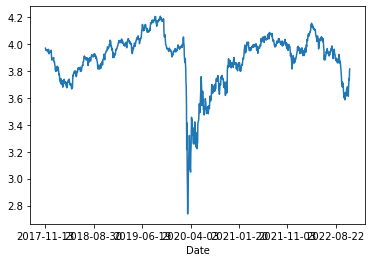

In [73]:
vtr["log_Adj Close"].plot()

6.

In [91]:
goog["log_Adj Close"].sum()

5508.609607488288

In [92]:
cvx["log_Adj Close"].sum()

5829.09134477947

In [93]:
trgp["log_Adj Close"].sum()

4529.311715812939

In [94]:
vtr["log_Adj Close"].sum()

4892.76520203082

In [95]:
for i in companies:
    print(i["Adj Close"].sum(),i["log_Adj Close"].sum())

132565.06072998047 5829.09134477947
62426.833397865295 4892.76520203082
106825.24478530884 5508.609607488288
50585.46150636673 4529.311715812939


CVX company did.

7.

<AxesSubplot:xlabel='Date'>

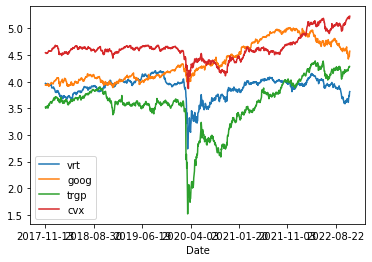

In [107]:
vtr["log_Adj Close"].plot(label='vrt',legend=True)
goog["log_Adj Close"].plot(label='goog',legend=True)
trgp["log_Adj Close"].plot(label='trgp',legend=True)
cvx["log_Adj Close"].plot(label='cvx',legend=True)

8.

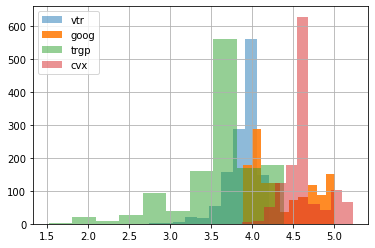

In [119]:
vtr["log_Adj Close"].hist(alpha=0.5,label='vtr')
goog["log_Adj Close"].hist(alpha=0.9,label='goog')
trgp["log_Adj Close"].hist(alpha=0.5,label='trgp')
cvx["log_Adj Close"].hist(alpha=0.5,label='cvx')
plt.legend(loc='upper left')

## Problem 2

In [120]:
df_SP500 = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

In [121]:
df_SP500.head()

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [125]:
df_SP500.shape

(503, 6)

1.

In [124]:
df_SP500.included.isna().sum()

45

2.

In [128]:
df_SP500 = df_SP500.dropna(subset=['included'], axis=0)
df_SP500.shape

(458, 6)

In [135]:
df_SP500.set_index("included")

,Symbol,Security,GICS Sector,hq,Founded
included,,,,,
09.08.1976,MMM,3M,Industrials,"Saint Paul, Minnesota",1902
26.07.2017,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",1916
31.03.1964,ABT,Abbott,Health Care,"North Chicago, Illinois",1888
31.12.2012,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2013 (1888)
31.05.2018,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",1981
...,...,...,...,...,...
06.10.1997,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997
23.12.2019,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",1969
07.08.2001,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",1927


In [140]:
pd.to_datetime(df_SP500["included"], dayfirst=True,errors='coerce')

0     1976-08-09
1     2017-07-26
2     1964-03-31
3     2012-12-31
4     2018-05-31
         ...    
498   1997-10-06
499   2019-12-23
500   2001-08-07
501   2001-06-22
502   2013-06-21
Name: included, Length: 458, dtype: datetime64[ns]

In [141]:
df_SP500.included.idxmax()

TypeError: reduction operation 'argmax' not allowed for this dtype

3.

In [148]:
df_SP500["GICS Sector"]

KeyError: 'GICS Sector'

In [147]:
df_SP500.groupby("GICS Sector")

KeyError: 'GICS Sector'